# 5291 Spring 23 Group Project

Group Members: Barbara Cai (YC4174), Jieyi Dong (JD3867), Han Wang (HW2912)

# 1. Hotel Data exploration: Reservation and Cancellation

## 1.1 Background 

For this project, we aim to analyze a comprehensive data set regarding hotels' reservations and cancellations. In the first part of the project, we will perform Exploratory Data Analysis and do a data cleaning regarding null and illogical data points. Then we will analyze specific areas within the data set to produce fruitful insight into the performance of hotels and customers. Finally, we will include a machine learning analysis to predict the cancellation of hotels. Specifically, we will using Logistic Model and Time Series Model in model fitting and then compare the prediction level between models to see which one has more precise prediction for our hotel dataset.

## 1.2 Exploratory Data Analysis

In [ ]:
#original df
#data before cleaning
#check for missing data and outliers
 #1. delete NA values 2. fill out missing values of children and country columns

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pdb
import requests
from lxml import etree
from lxml import html
import csv
import matplotlib as mpl
df = pd.read_csv('/Users/jz/Desktop/hotel_bookings.csv')

## 1.3 Data Cleaning
First, check the number of NA values in each column. We want to drop any column that has too many NA values.

In [5]:
for name in df.columns.tolist():
    na_count = df[name].isna().sum()
    if na_count != 0:
        print('Column',name, 'has', df[name].isna().sum(), 'NA entries')
    

Column children has 4 NA entries
Column country has 488 NA entries
Column agent has 16340 NA entries
Column company has 112593 NA entries


Children and country columns only have a few entries missing,so we fillied in the children with the average number and filled in country with 0. Since agent and company are missing many entries, we drop these two columns.

In [6]:
df = df.drop(columns = ['agent', 'company'])
df['country'].fillna(0, inplace=True)
df['children'].fillna(df['children'].mode()[0], inplace = True)

In [7]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


# 2. Data analysis and visualization

## 2.1 City Hotel vs. Resort Hotel

The first part of the analysis is a grand introduction to the project as we could clearly see that theres two types of hotels within the data set: City and Resort. We will structure our analysis in this project to discuss these two types of business seperately since we believe they are vastly different in real-world operations.

[Text(0.5, 0, 'Hotel Categories'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'Fig1-1: Resort Hotel and City Hotel Reservation/Cancelation')]

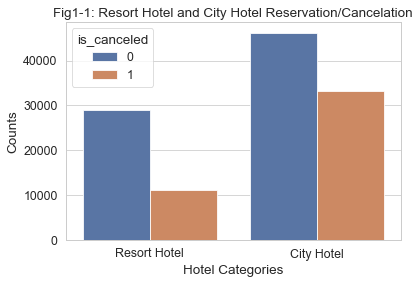

In [8]:
sns.set(style="whitegrid",font_scale=1.4,context="paper")
P1=sns.countplot(x='hotel', hue='is_canceled', data=df)
P1.set( xlabel = "Hotel Categories", ylabel = "Counts", title = 'Fig1-1: Resort Hotel and City Hotel Reservation/Cancelation')

In figure 1-1 We could clearly see that the reservation at city hotel is significantly higher than resort hotel. Which might indicate that the data set is collected from a more urban area, yet the resort hotel has substantial reservations also. In terms of cancellation, the cancelation rate at resort hotel is visually below 50% of its successful reservations. However, the city hotel has many more cancellations. This gives us an insight that Resort hotel customers are more committed to the reservation compared to the city hotel customers.

## 2.2 Customer-Country

After analysing from the consolidated perspective of the data set, we would like to dig a bit deeper into the customer composition, and generate insights about specific customer groups. First off, we will generate insight on our customers based on their nationalities.

Text(0.5, 1.0, 'Fig2-2:Top 10 Countries Cancelation Rate')

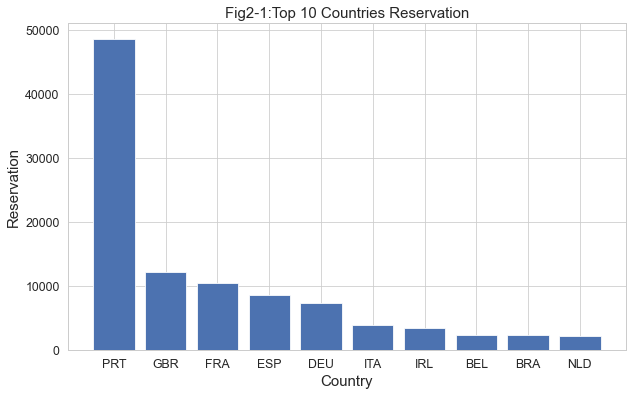

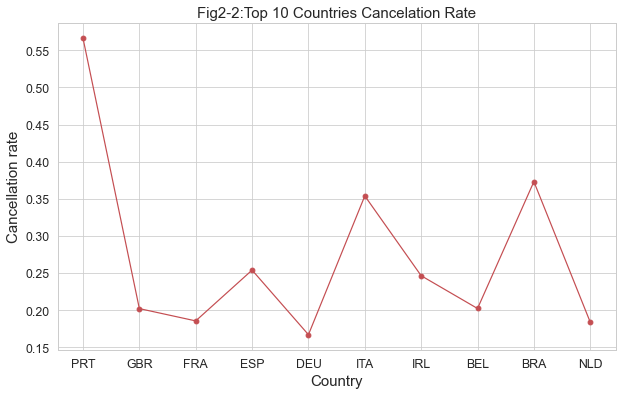

In [9]:
countriesT10 = list(df.groupby('country').size().sort_values(ascending=False).head(10).index)
df[df.country.isin(countriesT10)].shape[0] / df.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks(range(10), countriesT10)
ax1.bar(range(10), df[df.country.isin(countriesT10)].groupby('country').size().sort_values(ascending=False))
ax1.set_xlabel('Country',size=15)
ax1.set_ylabel('Reservation',size=15)
ax1.set_title('Fig2-1:Top 10 Countries Reservation',size=15,loc='center')

fig, ax2 = plt.subplots(figsize=(10, 6))
plt.xticks(range(10), countriesT10)
ax2.plot(range(10),df[df.country.isin(countriesT10)].groupby('country')['is_canceled'].mean().loc[countriesT10], 'ro-')
ax2.set_xlabel('Country',size=15)
ax2.set_ylabel('Cancellation rate', size=15)
ax2.set_title('Fig2-2:Top 10 Countries Cancelation Rate',size=15,loc='center')

In figure 2-1 and figure 2-2 we selected the top 10 countries of our customer base and took a look into their reservation count and cancellation rate. For figure 2-1, we discovered that the biggest customer base we have in this data set is Portugal customers, and it indicates that the data set is highly likely from Portuguese hotels. Beside the dominance of Portuguese customers, the UK and France are the next two in line. Surprisingly, the neighboring country,Spain, only came in fourth place in terms of numbers of reservations. This provides insight that the language requirement of the staff should prefer English and French besides the requirement of Portuguese. In figure 2-2, we could conclude that Portuguese, Italian and Brazilian Customers have the highest cancellation rate among the top 10 countries. Portuguese has a surprisingly high cancellation rate above 55%, and it is representing the highest reservation according to figure 2-1, thus it provides an insight that the management team needs to have a more strict cancellation policy to drive down the cancellation rate.

## 2.3 Customer- Size

Among our population, we are also interested to identify which of the specific population type of customers(like single adults, adults in groups of two people, friends in one group booking the hotel together) would be the one that is most likely to cancel their reservations in different types of hotels so that we can find the most effective measures to reduce different hotels' cancellation rates. 

In order to explore the differences in cancellation rates between these different population type groups, we first need to select the population type groups that we are interested in and then define each of those populatioon type group. 

We are mainly interested in 4 different population type groups: single adults booking hotels for themselves, two adults traveling together, friend groups travelling together, and people traveling in family units since these are the most common population type groups that we can think of when booking hotels. 

For the single adults group, it will just be 1 adult in the adult category with 0 children and 0 babies in the children and the babies category.

In [10]:
singleadults = (df.adults == 1) & (df.children == 0) & (df.babies == 0)

For the group of two adults travelling together, it will be 2 adults in the adult category with 0 children and 0 babies in the children and the babies category.

In [11]:
twoadults = (df['adults'] == 2) & (df['children'] == 0) & (df['babies'] == 0)

For the group with people traveling in family units, we assume each family will contain at least one adult in it and with at least 1 baby or 1 child with the adult.

In [12]:
families =  (df['adults'] >= 1) & (df['children'] >= 1) | (df['babies'] >= 1) 

For the freinds group travelling together, we assume each friend group will contain at least 3 adults with no children or babies.

In [13]:
friendsgroup = (df.adults >= 3) & (df.children == 0) & (df.babies == 0)

Now that we have selected and defined our population type groups, we graph out each group's cancelled to not cancelled comparison graphs side by side for the two different hotel types to see how they are different from each other in terms of cancellation ratios so we can figure out what actions can be taken by the hotels to prevent high cancellation rates. 

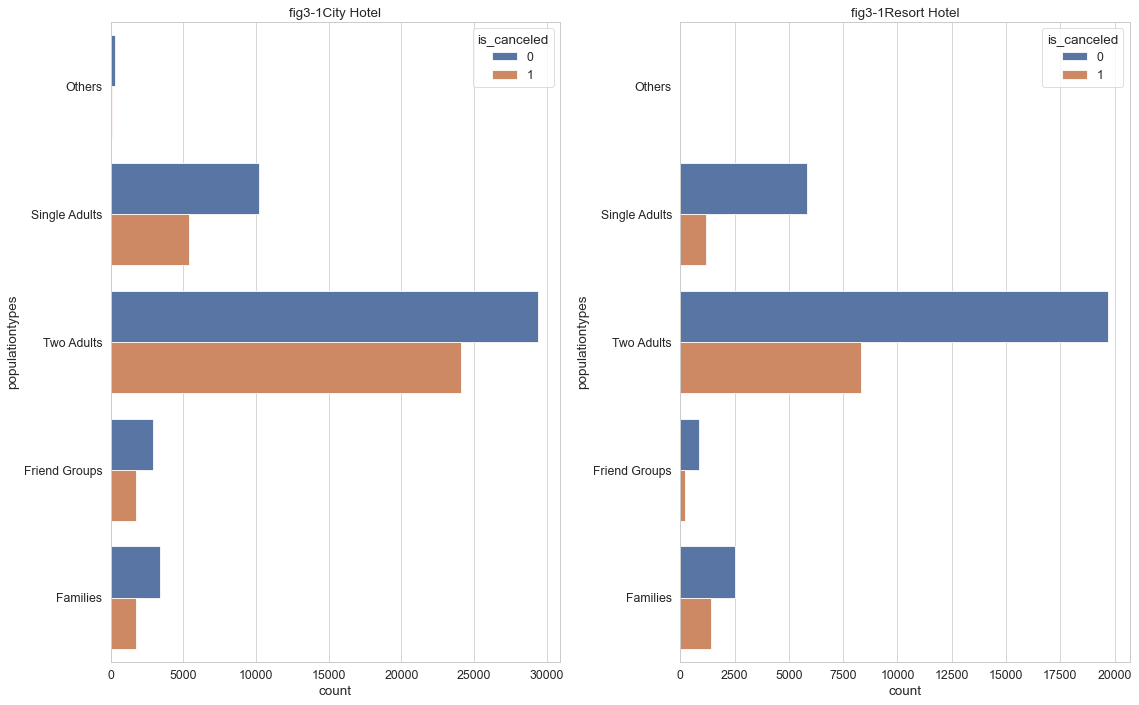

In [14]:
df['populationtypes'] = singleadults.astype(int) + twoadults.astype(int) * 2 + friendsgroup.astype(int) * 3 + families.astype(int) * 4 
plt.figure(figsize=(16,10))
index=1
for hoteltypes in ['City Hotel','Resort Hotel']:
    plt.subplot(1,2,index)
    index+=1
    sns.countplot(y='populationtypes',hue='is_canceled', data=df[df.hotel==hoteltypes])
    plt.yticks([0, 1, 2, 3, 4], ['Others','Single Adults', 'Two Adults', 'Friend Groups', 'Families'])
    plt.title('fig3-1'+hoteltypes)
    plt.tight_layout()

As we can see from figure 3-1 . For city hotels, the two adults travelling together group is the group that is most likely to cancel their hotel reservations. So a potential solution to reduce city hotels' cancellation rates is to create more incentives to attract their customers travelling in groups of 2 through things like providing better lounge bars and romantic dinning experiences. For resort hotels, the family group is the group that is most likely to cancel their reservations. Therefore, a plausible solution to reduce resort hotels' cancellation rates would be to promote themselves as family friendly hotels through providing services like babysitting to attract more customers travelling in family units.

## 2.4 Advance Booking

The effect of advance booking time on concellation rates is also something that we would like to explore.(By advance booking time, we mean the amount of time people book their hotels ahead of their actual check-in dates. The bigger the number on the category "lead_time", the earlier the customers make their hotel reservations for their trips.) 

Before we actually explore the correlation between advance booking time and cancellation rates, let's first graph out the distribution of advance booking time among customers to get a visualization and basic understanding of how early do people typically book their hotel reservations in advance for their trips. 

Text(0.5, 1.0, 'Fig4-1 Reservations Booked in Advance')

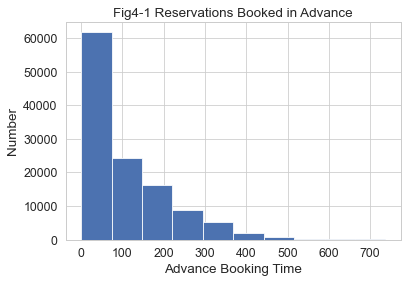

In [15]:
plt.hist(df['lead_time'])
plt.xlabel('Advance Booking Time')
plt.ylabel('Number')
plt.title('Fig4-1 Reservations Booked in Advance')

As we can see from the above distribution graph, most customers do not book their hotel reservations too advance. Which might indicates that there is room for price fencing to gain arbitrage in the customer behavior of no-advanced booking

In [16]:
df['lead_time'].corr(df['is_canceled'])

0.2931233557607148

Even though the correlation between customers' advance booking time and the cancellation rates of their hotel reservations is not quite as strong as we might have expected, there does appear a positive correlation which indicates that customers' advance booking time does play a role in affecting their reservation cancellation rates somehow and something can be done by the hotels to lower the cancellation rates by altering customers' advance booking time.

Now let's explore the relationship between advance booking time and cancellation rates visually.

Text(0.5, 1.0, 'Fig4-2 Cancellation for Booked in Advance')

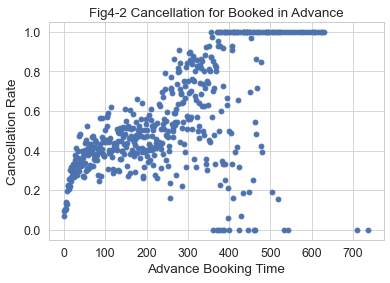

In [17]:
plt.plot(df.groupby('lead_time')['is_canceled'].mean(),'o')
plt.xlabel('Advance Booking Time')
plt.ylabel('Cancellation Rate')
plt.title('Fig4-2 Cancellation for Booked in Advance')

As we can see from figure 4-2, customers' cancellation rates of their hotel bookings go up as the advance booking time of their reservations increases. Therefore, an approach for the hotels to reduce their cancellation rates is to shorten the number of days that customers can book their hotels in advance. For example, only allowing customers to book their hotels 7 days ahead of their actual check-in dates. 

## 2.5 Seasonality

The next area for our analysis will be focused on a common phnomenon in hotel industry which is the seasonality of the business.The number of customers coming in the hotels flutuates around the year since there are holiday seasons and weather restrictions.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


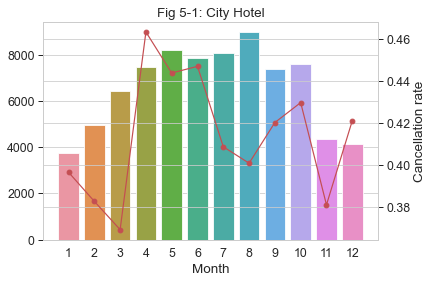

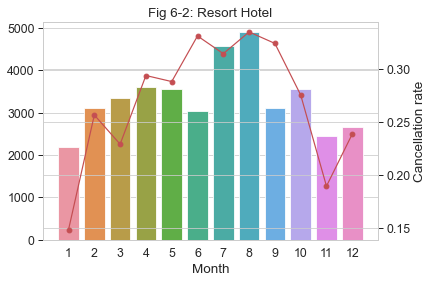

In [18]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

for hotel in ['City Hotel']:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    data_hotel=df[df.hotel==hotel]
    monthly = data_hotel.groupby('arrival_date_month').size()
    sns.barplot(list(range(1, 13)), monthly[ordered_months], ax=ax1)
    ax2.plot(
    range(12), data_hotel.groupby('arrival_date_month')
    ['is_canceled'].mean()[ordered_months].values, 'ro-')
    ax1.set_title('Fig 5-1: City Hotel')
    ax1.set_xlabel('Month')
    ax2.set_ylabel('Cancellation rate')
    
for hotel in ['Resort Hotel']:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    data_hotel=df[df.hotel==hotel]
    monthly = data_hotel.groupby('arrival_date_month').size()
    sns.barplot(list(range(1, 13)), monthly[ordered_months], ax=ax1)
    ax2.plot(
    range(12), data_hotel.groupby('arrival_date_month')
    ['is_canceled'].mean()[ordered_months].values, 'ro-')
    ax1.set_title('Fig 6-2: Resort Hotel')
    ax1.set_xlabel('Month')
    ax2.set_ylabel('Cancellation rate')

For city hotels, we could see seasonal peaks for bookings to reach the highest during the summer months from May through Auguest. As for cancelltion, the rates of cancellation is at the lowest during the winter months of November through march and it climbs dramatically leading up to the summer months. 

For resort hotels, we could see seasonal peaks for bookings to also reach the highest during the summer months, with July and August at its peak. As for cancelltion, the rates of cancellation is at the lowest during the winter months of November through January and it climbs dramatically leading up to the summer months. 

## 2.6 Price

In [56]:
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sorted_df = df.sort_values('arrival_date_month')

# 3.Model to Predict Cancellation

## 3.1 Parameter selection
From the analysis above we know that guests who cancel the most are couples and single adult. For city hotels and resort hotels, cancellation rate varies in different months. Therefore, we can start buidling the model by seperating hotels into two types and aiming to capture the effect of guest type.

We would also like to capture effects of other parameters that potentially affect the cancellation rate, so we do the following correlation analysis:

In [121]:
parameters = df.columns.tolist()
cor = []
print('Correlation between is_canceled and ')
for p in parameters:
    if isinstance(df[p][0] ,np.int64):
        temp = df[p].corr(df['is_canceled'])
        cor.append(temp)
        print(p.ljust(30,'-'), ':' , '{:{width}.{prec}f}'.format(temp,width=3,prec=2))

Correlation between is_canceled and 
is_canceled------------------- : 1.00
lead_time--------------------- : 0.29
arrival_date_year------------- : 0.02
arrival_date_week_number------ : 0.01
arrival_date_day_of_month----- : -0.01
stays_in_weekend_nights------- : -0.00
stays_in_week_nights---------- : 0.02
adults------------------------ : 0.06
babies------------------------ : -0.03
is_repeated_guest------------- : -0.08
previous_cancellations-------- : 0.11
previous_bookings_not_canceled : -0.06
booking_changes--------------- : -0.14
days_in_waiting_list---------- : 0.05
required_car_parking_spaces--- : -0.20
total_of_special_requests----- : -0.23


From the output we can see that 'lead_time' and 'previous_cancellations' have significant positive correlations with cancellation. 'required car parking spaces', 'booking_changes', and 'total of sepcial requests' have significant negative correlations with 'iscanceled'.

Furthermore, 'babies' has a low negative correlation which intuitively make sense. Maybe guests that travel with babies are less inclined to change their schedule.

'is_repeated_guest' and 'previous_booking_not_canceled' both have low but negative correlations with cancelling. These two also intuitivly make sense. Visit the hotel repeatly implies that the guests like the hotel so they are less likly to change compared to the others. Therefore, we want to take them into consideration further on.

'adults' and 'days_in_waiting_list' have low positive correlation with cancelling. It is reasonable to assume that the longer a guest is in the waiting list, the more impatient he/she will be, so the guest is more likely to cancel. The guest could also be looking for other hotels while in the waiting list which also make cancellation more likely. For 'adults', intuitivly we cannot think of a good assumption of it, but we still want to take it into consideration just in case.

In [122]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,populationtypes
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [123]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'populationtypes'],
      dtype='object')

In [136]:
# Construct a matrix containing features and y_values
M = pd.DataFrame({'lead_time' : df['lead_time'].tolist(),
                  'previous_cancellations' : df['previous_cancellations'].tolist(),
                  'required_car_parking_spaces' : df['required_car_parking_spaces'].tolist(),
                  'is_repeated_guest' : df['is_repeated_guest'].tolist(),
                  'previous_booking_not_canceled' : df['previous_bookings_not_canceled'].tolist(),
                  'babies' : df['babies'].tolist(),
                  'adults' : df['adults'].tolist(),
                  'days_in_waiting_list' : df['days_in_waiting_list'].tolist(),
                  'arrival_date_day_of_month' : df['arrival_date_day_of_month'].tolist(), 
                  'populationtypes' : df['populationtypes'].tolist(),
                  'is_canceled' : df['is_canceled'].tolist()})
# Split data into trainning set and testing set
M_train = M.sample(frac = 0.75)
M_test = M.drop(M_train.index)
# Split data into train_X, train_y, test_X, and test_y in ndarray forms 
train_X = M_train.drop(columns=['is_canceled']).to_numpy()
train_y = M_train['is_canceled'].to_numpy().ravel()
test_X = M_test.drop(columns=['is_canceled']).to_numpy()
test_y = M_test['is_canceled'].to_numpy().ravel()

## 3.2 Logistic Model

In [137]:
# Fit a logstic model to Train_X
clf = LogisticRegression(random_state=0).fit(train_X, train_y)
# Predict y based on test_X
pred_y = clf.predict(test_X)
# Use value_counts to see the how prediction distribution
pd.DataFrame(pred_y, columns = ['cancel'])['cancel'].value_counts()

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0    24864
1     4984
Name: cancel, dtype: int64

## 3.3 Accuracy
We especially care bout type II error, because if we make type I error, the hotel can still make revenue, but it we make type II error, the hotel could end up leaving empty rooms. 

#### Accuracy in general

In [128]:
ac = 0
c = 0
for i in range(len(test_y)):
    if pred_y[i] == test_y[i]:
        ac+=1
    c+=1
ac/c

0.6934467971053337

#### Type II  error

In [129]:
er = 0
c = 0
for i in range(len(test_y)):
    if pred_y[i] == 0 & test_y[i] == 1:
        er+=1
    c+=1
er/c

0.0

The model does not make type II error. This is good.

#### Power of test

In [130]:
rej = 0
c = 0
for i in range(len(test_y)):
    if pred_y[i] == 1 & test_y[i] == 1:
        rej+=1
    c+=1
rej/c

0.11293889037791477

The model successfully predicted 11.3% of cancellation. Since the model does not make Type II error, we know that all the errors come from not being able to reject the null hypothesis which is 'the guest will not cancel their order'.

To improve the model, we can change what parameters we choose

We only care about if guest is single or a couple or not, so we make this variable either 1 or 0.

In [132]:
df['populationtypes_mod'] = singleadults.astype(int) + adultsincouples.astype(int)

We can also try removing parameters that have low correlation with cancellation rate

In [138]:
# New matrix
M = pd.DataFrame({'lead_time' : df['lead_time'].tolist(),
                  'previous_cancellations' : df['previous_cancellations'].tolist(),
                  'required_car_parking_spaces' : df['required_car_parking_spaces'].tolist(),
                  'arrival_date_day_of_month' : df['arrival_date_day_of_month'].tolist(), 
                  'populationtypes' : df['populationtypes'].tolist(),
                  'is_canceled' : df['is_canceled'].tolist()})
# Split data into train_X, train_y, test_X, and test_y in ndarray forms 
train_X = M_train.drop(columns=['is_canceled']).to_numpy()
train_y = M_train['is_canceled'].to_numpy().ravel()
test_X = M_test.drop(columns=['is_canceled']).to_numpy()
test_y = M_test['is_canceled'].to_numpy().ravel()
# Fit a logstic model to Train_X
clf = LogisticRegression(random_state=0).fit(train_X, train_y)
# Predict y based on test_X
pred_y = clf.predict(test_X)
# Use value_counts to see the how prediction distribution
pd.DataFrame(pred_y, columns = ['cancel'])['cancel'].value_counts()

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0    24864
1     4984
Name: cancel, dtype: int64

In [139]:
ac = 0
er = 0
rej = 0
c = 0
for i in range(len(test_y)):
    if pred_y[i] == test_y[i]:
        ac+=1
    if pred_y[i] == 0 & test_y[i] == 1:
        er+=1
    if pred_y[i] == 1 & test_y[i] == 1:
        rej+=1
    c+=1
print('The accuracy rate of the model is', ac/c,
      '\nThe Type II error rate is', er/c,
      '\nThe power of model is', rej/c)

The accuracy rate of the model is 0.6913696060037523 
The Type II error rate is 0.0 
The power of model is 0.11394398284642188


This is not idfferent than the complex model we built, which implies that the parameters we removed from the model contribute nothing to the prediction of cancellation. Also they might intuitivly make sense, their effect on cancellation could be too small to matter the result.

Overall, this model has some power of test which could provide insight for hotel managers about what are some key features they should be looking at concerning to the cancellation rate. For example, if the guests are a couple, or a single adult, if they require parking space, and how early they booked the room.

# 4. Model Comparison

# 5. Conclusion

# Reference

 data collection: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
 one graph in this paper is similar to our project's graph: https://medium.com/analytics-vidhya/exploratory-data-analysis-eda-for-predicting-hotel-booking-cancellations-using-machine-learning-3990be4af2ff